Using Julia as a R user
==============


**Author:** *everyone who wants*

# Plots 

## : list of available packages

List of packages for plots :

-   [**Plots**]
-   [**StatsPlots**]
-   [**Makie**]
-   [**TidierPlots**]
-   [**AlgebraOfGraphics**] uses Makie
-   [**GadFly**]


Other packages are available, see (https://discourse.julialang.org/t/comparison-of-plotting-packages/99860/2)


---


## Using TidierPlots

https://tidierorg.github.io/TidierPlots.jl/latest/


The goal here is to be able to do the same sort of graphics as when using R ggplot2, that we all love.

Install the package using ], then add TidierPlots.

The package supports ggplot(), and :

- some Geoms 
- some themes, with the default being the ggplot2 theme
- scale\_colour\_manual and discrete
- facetting with wrap and grid
- scale, labs,lims

TidierPlots uses AlgebraOfGraphics, which uses Makie.

In [1]:
# Example using a Julia dataframe :
# you need to run the  PalmerPenguins.load() in the console when doing it for the first time
# and press y when it asks if you want the data downloaded.
using TidierPlots
using DataFrames


using PalmerPenguins


penguins = dropmissing(DataFrame(PalmerPenguins.load()))




Row,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,Float64,Float64,Int64,Int64,String7
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18.0,195,3250,female
4,Adelie,Torgersen,36.7,19.3,193,3450,female
5,Adelie,Torgersen,39.3,20.6,190,3650,male
6,Adelie,Torgersen,38.9,17.8,181,3625,female
7,Adelie,Torgersen,39.2,19.6,195,4675,male
8,Adelie,Torgersen,41.1,17.6,182,3200,female
9,Adelie,Torgersen,38.6,21.2,191,3800,male


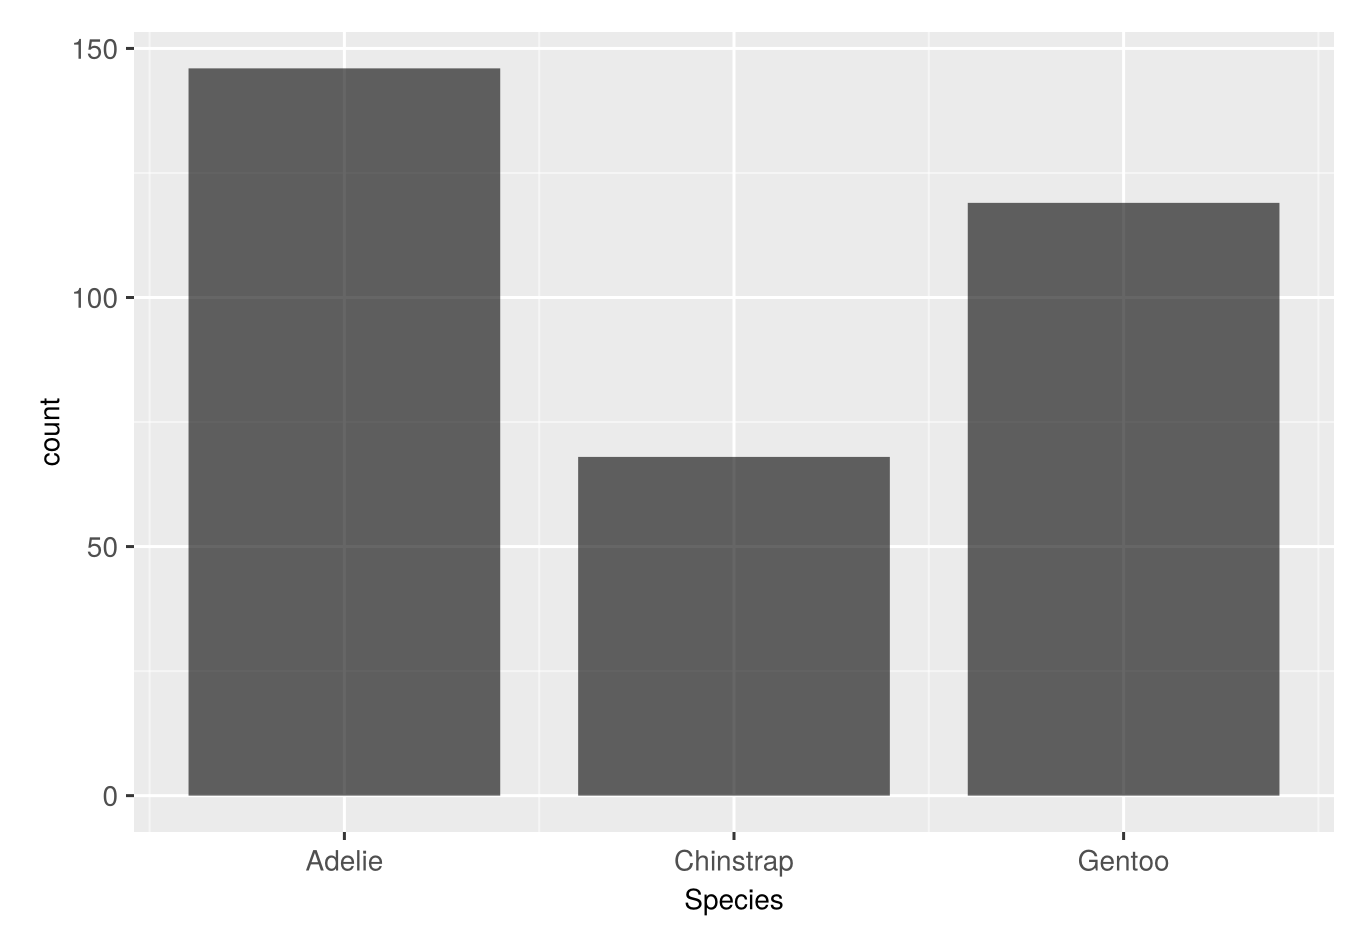

ggplot options
data: A DataFrame (333 rows, 7 columns)

height: 400
x: Species
width: 600

geom_bar
data: inherits from plot
x: species 



In [5]:
g=TidierPlots.ggplot(data = penguins) + 
    geom_bar(@aes(x = species)) +
    labs(x = "Species");
g

## Combining plots

Just like the *patchwork* package, we can combine plots, with + and | for horizontal and / for vertical.

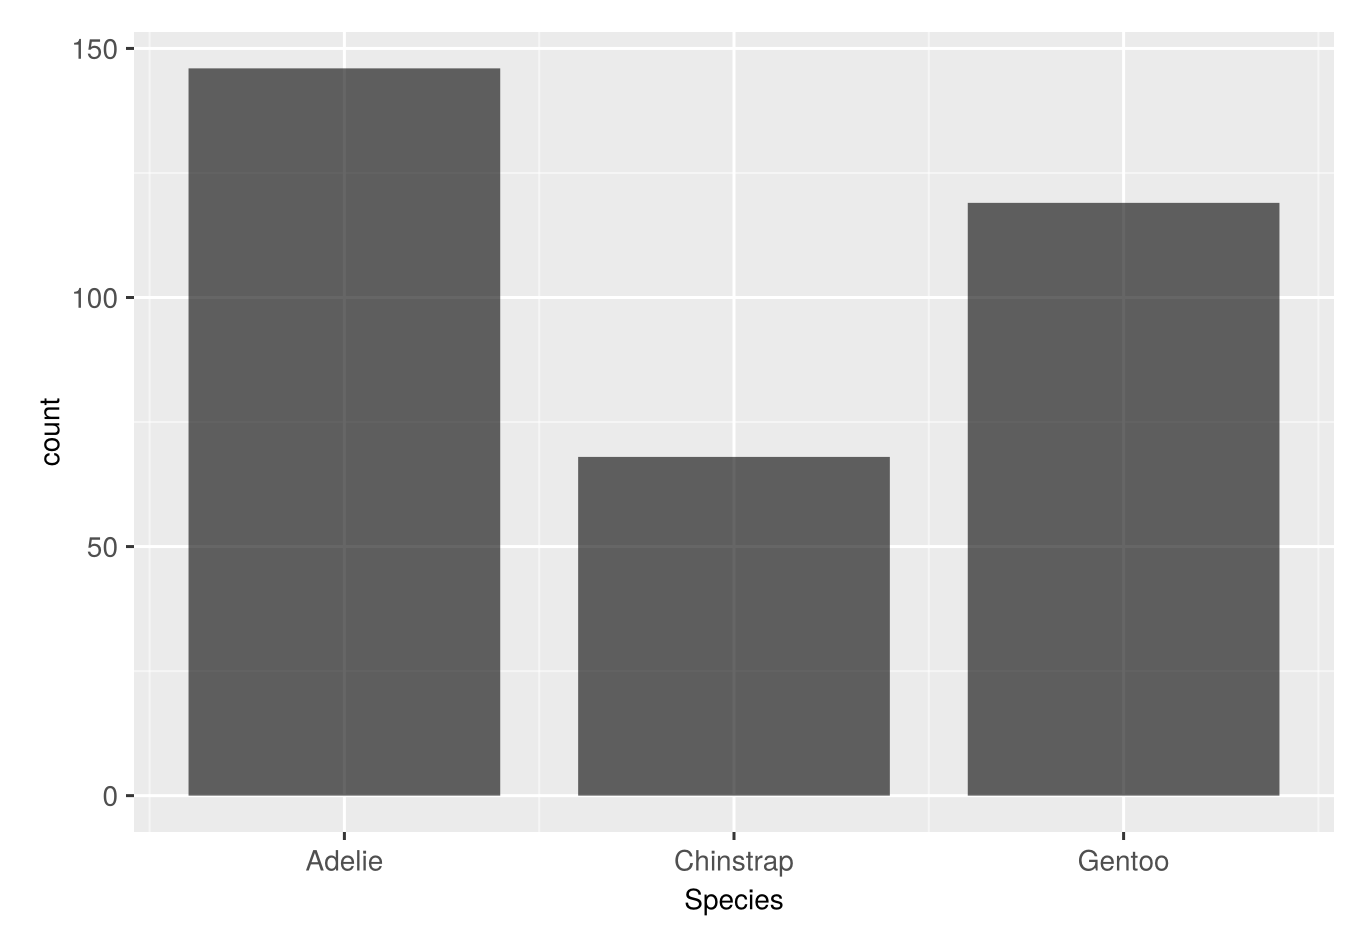

ggplot options
data: A DataFrame (333 rows, 7 columns)

height: 400
x: Species
width: 600

geom_bar
data: inherits from plot
x: species 



In [3]:
(g+g)

In [4]:
g/(g+g)

MethodError: MethodError: no method matching /(::TidierPlots.GGPlot, ::TidierPlots.GGPlot)

Closest candidates are:
  /(!Matched::ChainRulesCore.NotImplemented, ::Any)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/notimplemented.jl:42
  /(::Any, !Matched::ChainRulesCore.NotImplemented)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/notimplemented.jl:43
  /(!Matched::ChainRulesCore.AbstractTangent, ::Any)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/abstract_tangent.jl:42
  ...


In [5]:
g/g +g

MethodError: MethodError: no method matching /(::TidierPlots.GGPlot, ::TidierPlots.GGPlot)

Closest candidates are:
  /(!Matched::ChainRulesCore.NotImplemented, ::Any)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/notimplemented.jl:42
  /(::Any, !Matched::ChainRulesCore.NotImplemented)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/notimplemented.jl:43
  /(!Matched::ChainRulesCore.AbstractTangent, ::Any)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/abstract_tangent.jl:42
  ...


In [6]:
((g + g + g) | g) / (g / g)

MethodError: MethodError: no method matching |(::TidierPlots.GGPlot, ::TidierPlots.GGPlot)

Closest candidates are:
  |(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:587


Warning ; the *aes* syntax exactly as ggplot2 does not exist. It has many equivalents

- @aes(x=x,y=y)
- @es(x=x,y=y)
- aes(x=:x,y=:y)
- aes(x="x",y="y")


In [7]:
g1=ggplot(penguins, @aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
    geom_point()
g2=ggplot(penguins, @aes(x=:bill_length_mm, y=:bill_depth_mm, color=:species)) +
geom_point()
g3=ggplot(penguins, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) +
geom_point()
g4=ggplot(penguins, @es(x = bill_length_mm, y = bill_depth_mm, color = species)) +
geom_point()

g1/g2+g3/g4

MethodError: MethodError: no method matching /(::TidierPlots.GGPlot, ::TidierPlots.GGPlot)

Closest candidates are:
  /(!Matched::ChainRulesCore.NotImplemented, ::Any)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/notimplemented.jl:42
  /(::Any, !Matched::ChainRulesCore.NotImplemented)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/notimplemented.jl:43
  /(!Matched::ChainRulesCore.AbstractTangent, ::Any)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_types/abstract_tangent.jl:42
  ...


The different syntaxes gave the same results !
The rest of the code is exactly the same as in ggplot2.

## Using Gadfly


Gadfly is also based on ggplot2.

In [8]:
using Gadfly

The basic plotting function is also called plot. 

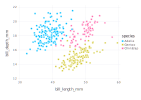

In [9]:
p = plot(penguins, x=:bill_length_mm, y=:bill_depth_mm,color=:species, Geom.point);
p